In [160]:
#from google.colab import drive
#drive.mount('/content/drive')
#!ls "/content/drive/My Drive/Web Mining Tut/Project/"
#%cd /content/drive/My\ Drive/Web Mining Tut/Project


In [161]:
import numpy as np
import pandas as pd
import re
import networkx as nx
from matplotlib import pyplot as plt

In [162]:
new_data = list(filter(None, [re.split(': |,', i.strip(': |,')) for i in open('data/dict.txt')]))
df = pd.DataFrame(new_data)
df.columns = ['match_id','player1', 'player2', 'player3', 'player4', 'player5', 'player6', 'player7', 'player8', 'player9', 'player10', 'timestamp']

In [163]:
df.head()
#len(df)

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
0,5845885766,MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL...,-HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf...,lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDI...,PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx...,ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985...,hiV3q6CiVYKGTn121rI1YyBhSgxwBK9tAKy55_fAf8o0e...,mYh6ADgVGK2KjYRGpZkV8T8dd-8rSEHfDVZiLb4u6iMGa...,7Ml02P31iKinrGK6gjPCD31RNfCxrKqGAlrCUuTIjZRGM...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,dQ36UZuepycXkzk8-2T3HeFUY6X9c8_Y3ojcTGV7GWnXc...,2022-04-28T17:36:26+00:00\n
1,5841618858,_3--XseBflvZRGosFiHnNJ5whIiX18G3SxttceO_GSWyvP...,1OmoyY3TquWvQj9BAVBhzSFlFIzuwqI6l2Kl05eE6fEVI...,3zQnK3QminFLKkPyQH7Bfr75Ra8XXRcnv9qpCrHlwil48...,EAHBBZJvMJ57KB61QFfcNkzA-KH-B5a6haX2rY1t3pC10...,gBBlYQwpLMDSpvl4aPrO-TmLzeRLiTeIRAl2yoA2wVjlg...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,KDq1FPkcUgSnbKtssjWhQJvrTetjRr2HetaAs61njl3u3...,-Ru7879pVSrvCfA9Fk0jaWvk6W4yYByOF1y3ILPPkhF2j...,_wCbDPrywLmgU4I4yRF-IaLnN-C3ps4dcprzezpT44lr7...,_yS5DjAaU74J5TNQUi3JozAdYAFs-Vm6hBFA8fokq_V-Y...,2022-04-25T17:18:47+00:00\n
2,5841587153,iXxRgiKTP3NEkfhvwcqz_WArj2JDsulrP9I-ZYCSO7-hlQ...,ogxaFPJ5x5DoKet0_cUj0CSye6pjzfYkdtR4pXn-ESYz2...,vMqdmthROzP07DXJSr9jqQMRcTG2x6iSggvGGfDuBmdi3...,nR7g5tSKtqVAHwn2awot_YSNg3ejWY4H-H_b3AyRBGCqj...,ZblgOWCSVI9hW-1fGfHkGqSN2dEZS08Cwoe1p-caP0Vht...,oYiUWghzgQkjEuokUxzWd4W_hFQXxonPgU91BnOxzsNla...,0Hg0KOBIP_9thE3KJLr4LBdbvhYgpXLuDwISJBjOr0Nnb...,e96nztvuMVE95jpte_SF31Oe6afLO_cbnuhxuzgHg5KII...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,r-w8vcIgcDPg_eDMQn-L4f8AyPFAhumx_2o4QSy_rM9Vr...,2022-04-25T17:05:34+00:00\n
3,5841653001,cpCgbyt3fScMiH6nXQK4JvUKJyQjAEHubtJuDmg-F2_bm2...,RExjdkvlFVP5O9OTRObFKBuA8i26BYjlBzBPwqjDb5KQy...,pMg0GcuDx7Xx0FgC7Xq6-UXfkcX3YWu-Np5u2f3J0wl6H...,QUXSUgl2ln_xpYS5xKrNs1tNkq7JvLw-C4sKnpov8YmM2...,T8GiTKk5wLX9hyejkdYSqKZG8_JKFest5j8ZpN4NtQkPw...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,DNNN1WR9Os_DgX_BJmit9x4slZd-6aIQxJtvXpiSlh11K...,oYiUWghzgQkjEuokUxzWd4W_hFQXxonPgU91BnOxzsNla...,oyeQ7J2KSr6xiS5uBOWKN-zxcxL6N2MlFIMXzxGnnJSN_...,e96nztvuMVE95jpte_SF31Oe6afLO_cbnuhxuzgHg5KII...,2022-04-25T16:45:01+00:00\n
4,5840049805,VmMVzhU2EOOIOi9Hpn37Y1oGB_lxhdSXduaDOmVRsx27UF...,PpHNPURUHgjxxnFnqpwfiUu2qcrL0RJpr_D8EcwY6Lq2S...,coKk4yRnv2JMXU1-9NEs6yXiZknd9teaxh-65dtQ5YFXY...,JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEs...,eUEumIfKWMUv1nvtdHh5-QNgrVqCy1W2i1jCAXoDnKFeg...,JF-pBwuE2-_qATKbC94zFdgJ_k9gAvbDttN3RovIHi6g-...,75R7kWN5V2IvOmVorK8i2WmCh25i3KH6NxvM3IUJ4TgsW...,OgQ8uYEXvbBpAgA-2xrBHDq1tm1u8SSHPPJpfV20yzMa6...,k00dkvI5zilXFRjARmTWTUtWssiTC_slWi5w6Ec4p2SQC...,XMgqoOooLzIgvwui1hKiKPnAhNqH0inD3UYTX8ZQSWpUi...,2022-04-24T18:21:44+00:00\n


In [164]:
df.to_csv('df.csv')

In [165]:
df.isnull().sum()

match_id       0
player1        0
player2        0
player3       67
player4      108
player5      111
player6      118
player7      120
player8      152
player9      154
player10     166
timestamp    167
dtype: int64

In [166]:
df.sort_values(by="match_id", ascending=False)

,match_id,player1,player2,player3,player4,player5,player6,player7,player8,player9,player10,timestamp
8151,5846695642,ayMeZxjaKrYYNLMdt4V9qGrm2B1q_LhJH9fzcx4eRiSvTt...,SDHGBv9QY200EcbEr8y98RJOGokUa3vcrf8tZp0JHRuML...,04jbW8Qpax5NmsiqYjrRvyK-0xY44FJlVgBMyQo6L8mlJ...,qRqPb06YFcHsIDFNC0TNQxAXPCMj-KrpWtV0qZNDausuK...,AGkbKJ96UIBxRMqDOshtrwnNcwcavjLqVFjZaV8owzS88...,OQRn3Y-DuanqLbnrvu_I9a9Wv3F4ep_xcXj68mLFr6MOQ...,W0_a_Ol3tp5ZesmeuIfvLgAWaxy6S_2LYwbGuKZZGZabs...,dKpS952_v9LnHEfK1Pq-YC8k_JPHwhso9h3ETuMeVzUs7...,czcqOPNiErLZbEnp2dIFqfiwlXkNJ45HN5SLSv49a6mv1...,B9NtYHPO2zck5n4v2tHMtlZS1psV9zOXvqTvVbY5u96AJ...,2022-04-28T21:25:32+00:00\n
6262,5846684351,gKDpezqtByS-MvjD7LXCsbq6qrxcPJMyUBOnBVn7Cj5pEe...,Ef9NbARPC5GjYe1anR7SkEBc0kIOIHuTT8oTZoeJWbmsl...,tR_gHUNMh1oIiIsWyQP1SVszswRxLjZCqB2Z9zLT7i1uO...,x-QcJf6YR0b05T_OX8bi-Zqvb2V_E0GCJx4x9kDvxHQ1m...,pmecpq8gnqJKejzk8wm4R1F8XOKV2EtMBdpwirb8x0N6I...,ttJ5KgXZNUHcNgCTbP8mR1dc4n9iAKAtAPqS3jMCHgiv_...,cQ1MdfivwPUCMgDu93qEOYbVpejOQtdbD3AN5dDtqFuvd...,5QFikmLVpBHvk7TNA7zytod3lxjrbT1Q6u6MDa1oSYnAX...,Hjo-lVDpBWp0WGfKJAiuPy9Hpo-uXlZ6fZHlM9wA7WVmn...,ffDj958Z7Vls3zbUhIKVXvsQ--NvIrL49CKmTOWTnekBR...,2022-04-28T21:20:30+00:00\n
7746,5846682981,UwFK4bBsgaoGE4LP8ssYabDIKwMdUUrQ-9t6ezJKAz_R1h...,DSJ63Hi2Qf7t9KiCMVHFnHUIVe_6qou9Ck6ziyhdEq3ZN...,BKrtP1LtLkQghLauMo1Go-fJNxw9ZvGyhMdq6O6PWG13j...,8IjD8Snct1T8ZmcMWRnKo7E_DUXPwo0KKEuCJKxSxiimB...,V2RvuD8VM7Fg-a7_O8WbaGVWNBa6VrENr1pByVtP7kQcZ...,WKeNi4pjvayPQg4iMasmR1GlwYcVj1k8qMiF1Lh5x-lPE...,UcIcrCV5BT-d2dactEozgPGisBBfwAYtRNJOHcAKMlc99...,YRKQz2vzht8p3GOuJqPIu_V6-spO13dGIORHLpzvO2oAI...,u-nwcmlCQWXVj2a6Xry4el1AQBYvidAta8sLsPbE_uQ4e...,bNhIuPW0g0wJwKM0bQ1cqvwxti7WUNitgU0iP7MInZKnj...,2022-04-28T21:12:26+00:00\n
7660,5846667593,MemopRdMboDdZeNF4hOOOMKZLpemrJWtaRlpixQwgLqa22...,88IOsipw2MkDtFq_gBinciLoNmm0CK4Zm-7iFd_QTrbJk...,ESsUjHC6151fcUdyEky26ccsHdhDbnOJBlaz2MtJt-z_6...,cxZMdpTzNNsNmP86Q-ycxeiYx7yY2EiivvtVf1Vahy3q8...,sKROSy28CQK_PSuWYVpZLgmvO2Og3Ia13uug7whKlbgF_...,pQu71hxoDrHwWpoMJI1sSu5r3fTKtKVLwr8wQ8SXa18Lq...,qdjBz1WEGblAOdBYLfAmpzTCRAtIBi-0Qt2DWzACR4-Tn...,FCldbiM4gQJ22lglpBS-YRXumn3nZk3FrLagul_8NCk-d...,CNUDvVJ7oReA9eRYBPzazORobVLFGfIVz6Va1z37urFMd...,hPFVt17uLgfZ18ToXb0hJVBahOia2BCOenDNeBJp8FWAK...,2022-04-28T21:34:05+00:00\n
7789,5846666710,3UzgyDt1yoU8vIq9xXIcrk3HmfMfn-AwkyPbYEHA3ZHSoT...,eLvqtkPgpP44K60YmyfF-ZCJbDyzmfmKWc1ADXeYBYoR-...,W0o41ZMeYX99gY04BfkyXpMK_0NCtdkGh-X8OkOMUeyTv...,Jeu1Hq2j-YJY4MXY4bkXbM9z2tu1CNHQ9y9ujb48dwfRp...,JIDjwsDYtP10augnhKT317c7OiN1AIQ1V1SCsb_Sq9JZt...,b830_VDjOFmosQdQ-SaTFHObkPRjT9wyC7-nrth5ebj7R...,l1MJaLpKqlwTjawAt6oSZB-4--66EOpyuhJJ7RiySwtmd...,HAa44lRgNkUpFoGzXfjZ98BXSKEHeaoQqQEAzNhvtfEqt...,nNOljaBpvYX5tnLPfB_V47pvg09VMvWogARTtfc6P-smu...,UZCQkF40nrSBC47btZnml15tuIpLZSk2IOMna0tgyatuI...,2022-04-28T21:31:29+00:00\n
...,...,...,...,...,...,...,...,...,...,...,...,...
4613,5657588390,ZJ5YFpKlxrcAzx2mqcZunuOoH0Y1hUY3JJBOwrJNsMvACj...,sPkkIdJ20KkvGaBejj_7IiMV01sflBIOwzymc6vPNaO8M...,7JyeOTmIdVEGIVuPe3hXZ2FT4RMNNLylxFEWxr3zlPvt7...,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWN...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3oU3QgvC26...,KEz7gG7VWC8yd0jjQhUgdtf8Itu9MjUa5f6Uav0rqJMnf...,DO1w_3G793UwTVnNALGfWdtcTbO_BXbi9_b83q2pJj9xN...,ds47mQ6dpXX_HTOWANMoeSEGuwf4aW8JvkMPreHnfmM6p...,dGAqxkASPB6UPCNzzyyFu1IyLqOWIstgbNR03DAqLUALS...,ry2haukSXuo98Ogtj3Rr9Nc4pWCiDLls6dYM-EpQwsQTs...,2022-01-09T16:07:57+00:00\n
4614,5657498220,yCiS3nvkbaaug6O8uctVvx8We91-IX3WeiR8gx0SbJWw6m...,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWN...,7JyeOTmIdVEGIVuPe3hXZ2FT4RMNNLylxFEWxr3zlPvt7...,rbJBRaYnc0ozuSba3EDF_uMbhrqMtDcLaMVIidS6XBa46...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3oU3QgvC26...,kq__z-g2vCIm5Kti1AWK00W_RABYJMYZK_sQZFyRqwsjS...,dswswj6cmIP9r9J1BwNpgMyKnjjgcaiLfrUjgFvXVarfO...,rugzWp6GVwAG79kV7cBwjJVsD99ZeCmhR3NSb0uW_YqgE...,WPaCDtlQMydhDTHDTzd0BZrhBaIBBgERt0iuevm5yLmYE...,YLJyMFHutI4dSuiNbTrewL_4yU4JnUX5_odhtegN3-n0P...,2022-01-09T15:24:17+00:00\n
4615,5655657074,VkRLkTVJN8DNiJmWpwnDsSiHwarRt35tbA1SFTEz3IqWNY...,zRaXJUWCymNlmwvRyzEpcU2yJKQryFBpKvf3

In [167]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'] )
df['timestamp'] = df.timestamp.values.astype('datetime64[D]')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   match_id   8170 non-null   object        
 1   player1    8170 non-null   object        
 2   player2    8170 non-null   object        
 3   player3    8103 non-null   object        
 4   player4    8062 non-null   object        
 5   player5    8059 non-null   object        
 6   player6    8052 non-null   object        
 7   player7    8050 non-null   object        
 8   player8    8018 non-null   object        
 9   player9    8016 non-null   object        
 10  player10   8004 non-null   object        
 11  timestamp  8003 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(11)
memory usage: 766.1+ KB


In [169]:
times_per_day = df.groupby('timestamp').size()
print(times_per_day)

timestamp
2021-09-04       1
2021-09-10       1
2022-01-08       1
2022-01-09       2
2022-01-15       1
              ... 
2022-04-24     990
2022-04-25     926
2022-04-26    1255
2022-04-27    1433
2022-04-28    1149
Length: 69, dtype: int64


In [170]:
times_per_day.describe()

count      69.000000
mean      115.985507
std       308.028861
min         1.000000
25%         2.000000
50%         5.000000
75%        19.000000
max      1433.000000
dtype: float64

In [173]:
import matplotlib.pyplot as plt

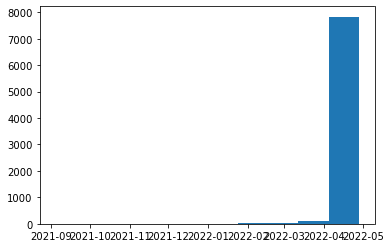

In [174]:
# plot a histogram of daily playing
plt.hist(df['timestamp'])
plt.show()

The time frame of the data is from September 4, 2021 to April 28, 2022.The distribution of daily times of games is shown in the figure above.


In [175]:
df_melted= (df.melt(['match_id', 'timestamp'], 
                       var_name='player_number',
                       value_name='player_puuid'))

In [176]:
df_melted['timestamp'] = pd.to_datetime(df_melted['timestamp'] )

In [177]:
df_melted['timestamp'] = df_melted.timestamp.values.astype('datetime64[D]')

In [178]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81700 entries, 0 to 81699
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   match_id       81700 non-null  object        
 1   timestamp      80030 non-null  datetime64[ns]
 2   player_number  81700 non-null  object        
 3   player_puuid   80704 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.5+ MB


In [179]:
df_melted.head()

#len(df_melted)


,match_id,timestamp,player_number,player_puuid
0,5845885766,2022-04-28,player1,MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL...
1,5841618858,2022-04-25,player1,_3--XseBflvZRGosFiHnNJ5whIiX18G3SxttceO_GSWyvP...
2,5841587153,2022-04-25,player1,iXxRgiKTP3NEkfhvwcqz_WArj2JDsulrP9I-ZYCSO7-hlQ...
3,5841653001,2022-04-25,player1,cpCgbyt3fScMiH6nXQK4JvUKJyQjAEHubtJuDmg-F2_bm2...
4,5840049805,2022-04-24,player1,VmMVzhU2EOOIOi9Hpn37Y1oGB_lxhdSXduaDOmVRsx27UF...


In [180]:
df_melted.to_csv('df_melted.csv')


In [181]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81700 entries, 0 to 81699
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   match_id       81700 non-null  object        
 1   timestamp      80030 non-null  datetime64[ns]
 2   player_number  81700 non-null  object        
 3   player_puuid   80704 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.5+ MB


in the 81700 matching records, there are 80704 player played game with each other.

In [182]:
df_melted.isnull().sum()

match_id            0
timestamp        1670
player_number       0
player_puuid      996
dtype: int64

In [183]:
# group players
players = df_melted.groupby('player_puuid').count().sort_values(by="match_id", ascending=False)
players.head(10)

,match_id,timestamp,player_number
player_puuid,,,
BOT,363,291,363
,67,0,67
JdCOKEWx8jUHK-LCDvx-H6-trrJN9z3EnEzv-Lb3osOEsJgXmHb_0RKApo08pSmyhgV323czEK_4jw,57,57,57
-HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ,55,55,55
ZblgOWCSVI9hW-1fGfHkGqSN2dEZS08Cwoe1p-caP0VhtSFyKibEnH9cuf-iEEkLl8d1iqEcq_8tHA,54,54,54
V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg,50,50,50
WJ1RUSzS3MnoEw5IAcBw92jEWdh5IG9VAp6TK3dv_7ALELH84vrK0pdDBrj4ALghfLiPWw2jq56Tmg,48,46,48
iO8F5AFtmu9ppwFWvXuz4YnWPI_1sRi4s5P91uY7lZrPqVdfNIxxD8zsogJOPNsXF0IzmEhlrIaUJQ,47,47,47
ak2NenNBzlJI99L56EAlX8cgYKPd3LwyHGeN2zpqrIKsujcMvM6SXQQfq3-aFKPNJxBi8piC4uGX-w,47,47,47


To do:

*   get rid of \n at timestamp
*   get rid of empty cells (no timestamp, puuid)



In [184]:
G = nx.Graph()

for index, row in df.iterrows():
    for i in range(1, 11):
        for j in range(1, 11):
            if i != j:
                node_i = row["player" + str(i)]
                node_j = row["player" + str(j)]
                
                if(node_i is not None and node_j is not None and node_i != node_j):
                    if(G.has_edge(node_i, node_j)):
                        G[node_i][node_j]["weight"] = G[node_i][node_j]["weight"] + 1
                    else:
                        G.add_edge(node_i, node_j, weight=1)
    

In [185]:
print("The graph has " + str(len(G.nodes)) + " nodes(players) and " + str(len(G.edges)) + " edges.")

The graph has 58802 nodes(players) and 329353 edges.


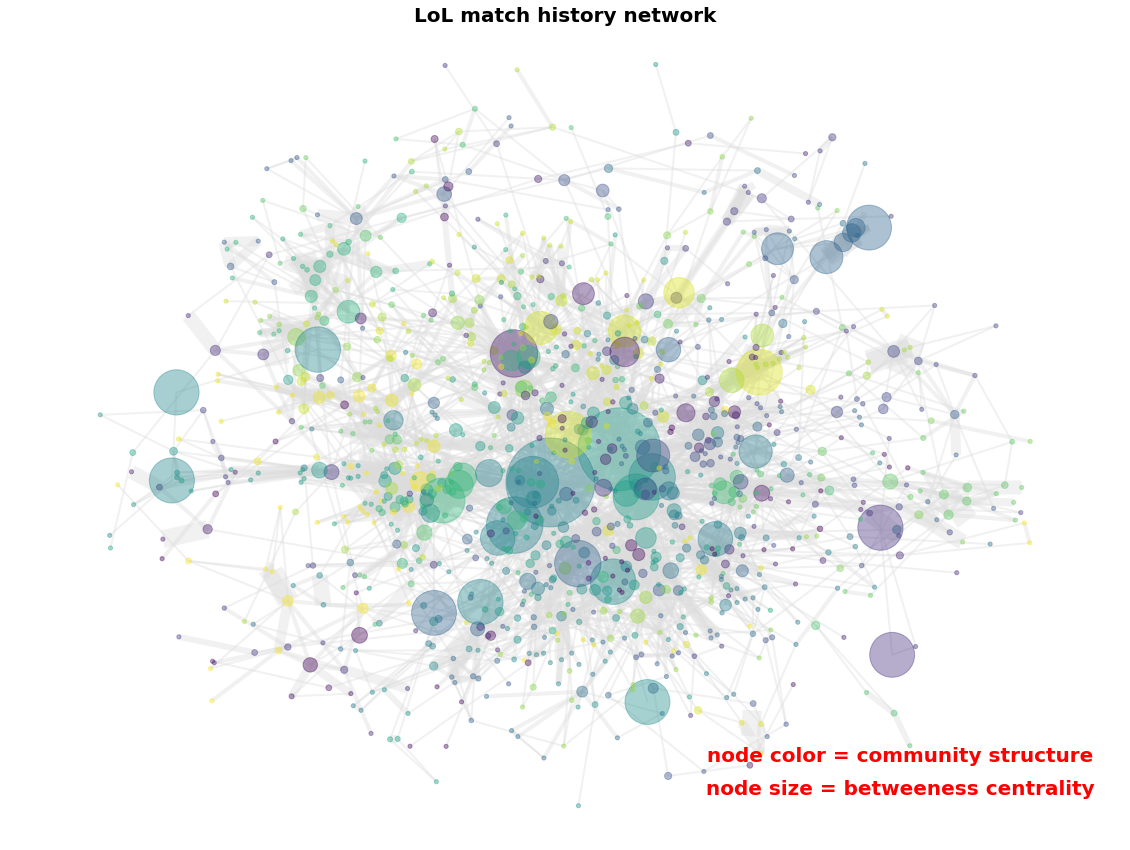

In [186]:
from random import sample

new_G = nx.Graph(G)

num_to_remove = int(len(new_G) / 2)
nodes = sample(list(new_G.nodes), num_to_remove)
new_G.remove_nodes_from(nodes)

# remove low-degree nodes
low_degree = [n for n, d in new_G.degree() if d < 10]
new_G.remove_nodes_from(low_degree)

# largest connected component
components = nx.connected_components(new_G)
largest_component = max(components, key=len)
H = new_G.subgraph(largest_component)

# compute centrality
centrality = nx.betweenness_centrality(H, k=10, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(H)
community_index = {n: i for i, com in enumerate(lpc) for n in com}

#### draw graph ####
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(H, k=0.15, seed=4572321)
node_color = [community_index[n] for n in H]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx_nodes(
    H,
    pos=pos,
    node_color=node_color,
    node_size=node_size,
    alpha=0.4,
)

for edge in H.edges(data='weight'):
    nx.draw_networkx_edges(
        H,
        pos=pos,
        edgelist=[edge],
        width=edge[2],
        edge_color="gainsboro",
        alpha=0.4,
    )

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("LoL match history network", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.savefig("graph_sampled.png")
plt.show()

# Basic Network Analysis: 
Degree distribution, average clustering coefficient, diameter and centrality.

In [191]:
print(nx.info(new_G))

Name: 
Type: Graph
Number of nodes: 1289
Number of edges: 3002
Average degree:   4.6579


there are approximately 1289 nodes (players) and 3002 edges (matching relation). The average number of player matched is 4.65.

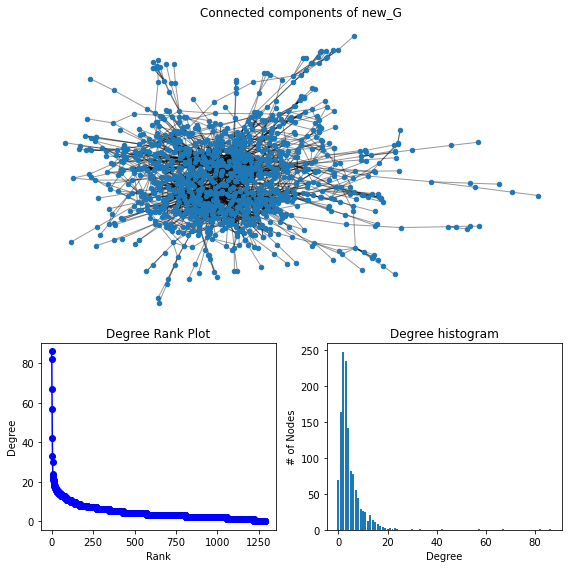

In [192]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#G = nx.gnp_random_graph(100, 0.02, seed=10374196)

degree_sequence = sorted((d for n, d in new_G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of G", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = new_G.subgraph(sorted(nx.connected_components(new_G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of new_G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

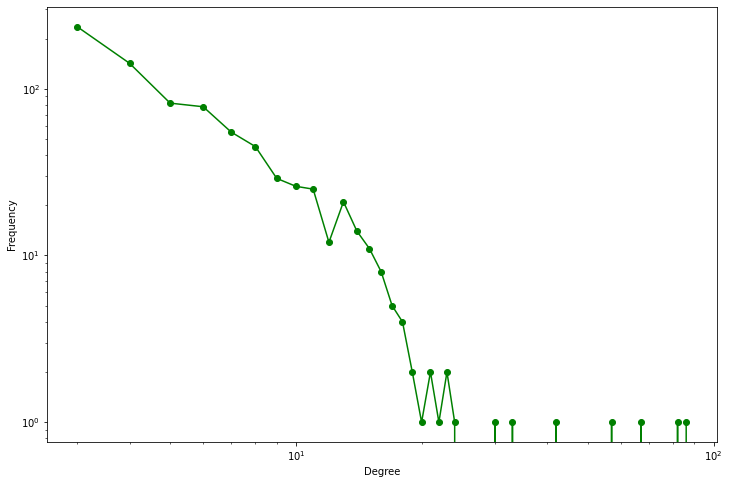

In [193]:
degree_freq = nx.degree_histogram(new_G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[3:], degree_freq[3:],'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

From the degree distribution graph and frequency count graph it can be seen that most nodes (players) have degrees between 1 and 20. 

In [194]:
sorted(new_G.degree, key=lambda x: x[1], reverse=True)

[(' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ',
  86),
 (' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA',
  82),
 (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ',
  67),
 (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA',
  57),
 (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg',
  42),
 (' mPOEEQnTxw9hN18qd0PzxL3WoBfKQnsHp54_jlY30CXQHLChEsT8vq8tv9b6dNFKVOjUvHx-YkjKYA',
  33),
 (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q',
  30),
 (' yet_pK35vt069q1fzVBsYOVIedInFQ4QyKhRpLrTD73-2Yi667QYH_D-RSkbD1GA9ospijDjWf2aHg',
  24),
 (' L9s0X_CXAODXcHXyT2bDVoYHBUQc-QEv0p1W5AWxWqibh8MfS4BrKjjgH7Q1zCvHjpbjgo1HfDF42Q',
  23),
 (' iNUxNvsvCjNqmbI2N9Eq_WORI73Hzjv13ZXVfhKg-IvY4VOcLaPHlak-VNI9iQXa9C6TwBt2_FbhIA',
  23),
 (' D3Pg1MXHLwxHKvuqzJ1bzdo36S6ygsRzAtToErIVVl39z-U1wxa8CMiHKowwwGujNq4_MkNbEoon

The top three players with the most matching players in the network graph are::
* -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ',
  86),
* (' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA',
  82),
* (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ',
  67),
* (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA',
  57),
*  (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg',
  42),

Graph Density

In [195]:
print("Density of the graph:", nx.density(new_G))

Density of the graph: 0.0036163620506049756


Density is the degree of connectedness, in our network the desity is  0.003.very sparse.

Average clustering coefficient

In [196]:
# Average Clustering for  graph
print(nx.average_clustering(new_G))

0.44051528351325936


In our graph, the average clustering coefficient is 0.42 which is higher than the average clustering coefficient in the random graph->the graph has some community strcture

Diameter(maximum distance between any pair of nodes in the graph) and average distance

Since there is no shortest path between nodes of one component and nodes of another, nx.diameter() returns the “not connected” error. we can remedy this by first finding out if  Graph “is connected” (i.e. all one component) and, if not connected, finding the largest component and calculating diameter on that component alone.

 largest strongly connected component (in terms of the number of nodes) in this network.

In [197]:
# If your Graph has more than one component, this will return False:
print(nx.is_connected(new_G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(new_G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = new_G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 15


Since we took the largest component, we can assume there is no larger diameter for the other components. Therefore this figure is a good stand in for the diameter of the whole Graph. The network diameter of this network’s largest component is 15: there is a path length of 15 between the two farthest-apart nodes in the network.

In [151]:
print('Average shortest connection between actors in largest component:', nx.average_shortest_path_length(subgraph, weight=None))


Average shortest connection between actors in largest component: 5.1385769269325525


In [198]:
print("Number of connected components of new_G: ", nx.number_connected_components(new_G))

Number of connected components of new_G:  91


Transitivity is the ratio of all triangles over all possible triangles. A possible triangle exists when one player playes with two people. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections.

In [199]:
triadic_closure = nx.transitivity(new_G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.2791118734514961


Centrality

In [200]:
deg_centrality = nx.degree_centrality(subgraph)

In [201]:
dict1_sorted_values = sorted(deg_centrality.items(),key = lambda x:x[1],reverse = True)

In [203]:
print(dict1_sorted_values)

[(' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.07369323050556983), (' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.07026563838903171), (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.05741216795201371), (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.048843187660668384), (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg', 0.03598971722365039), (' mPOEEQnTxw9hN18qd0PzxL3WoBfKQnsHp54_jlY30CXQHLChEsT8vq8tv9b6dNFKVOjUvHx-YkjKYA', 0.02827763496143959), (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q', 0.02570694087403599), (' yet_pK35vt069q1fzVBsYOVIedInFQ4QyKhRpLrTD73-2Yi667QYH_D-RSkbD1GA9ospijDjWf2aHg', 0.020565552699228794), (' L9s0X_CXAODXcHXyT2bDVoYHBUQc-QEv0p1W5AWxWqibh8MfS4BrKjjgH7Q1zCvHjpbjgo1HfDF42Q', 0.01970865467009426), (' iNUxNvsvCjNqmbI2N9Eq_WORI73Hzjv13ZXVfhKg

In the subgraph(network’s largest component), the top five players who with a wide range of game friends (very connected individuals)are listed
* -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.07369323050556983), 
* (' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.07026563838903171), 
* (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.05741216795201371), 
* (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.048843187660668384), 
*  (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg', 0.03598971722365039)

In [205]:
close_centrality = nx.closeness_centrality(subgraph)
dict2_sorted_values = sorted(close_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[(' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.3384570765661253), (' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.3345756880733945), (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.3176374523679913), (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q', 0.29946112394149343), (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29529352226720645), ('MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29306880964339527), (' 7Ml02P31iKinrGK6gjPCD31RNfCxrKqGAlrCUuTIjZRGMDktKtodb_bo-0x_NXs8sfZ4EKd-qBO9Pw', 0.2863101079489696), (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg', 0.2799904030710173), (' mPOEEQnTxw9hN18qd0PzxL3WoBfKQnsHp54_jlY30CXQHLChEsT8vq8tv9b6dNFKVOjUvHx-YkjKYA', 0.27595176164577917), (' yet_pK35vt069q1fzVBsYOVIedInFQ4QyKhRpLrTD73-2Yi6

In the subgraph(network’s largest component), the top five players who are good ‘broadcasters are listed
* lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.3384570765661253), 
* (' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.3345756880733945), 
* (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.3176374523679913),
* (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q', 0.29946112394149343), 
* (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29529352226720645), 

In [206]:
bet_centrality = nx.betweenness_centrality(subgraph, normalized = True, 
                                              endpoints = False) 

In [207]:
dict3_sorted_values = sorted(bet_centrality.items(),key = lambda x:x[1],reverse = True)
print(dict2_sorted_values)

[(' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.3384570765661253), (' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.3345756880733945), (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.3176374523679913), (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q', 0.29946112394149343), (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29529352226720645), ('MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29306880964339527), (' 7Ml02P31iKinrGK6gjPCD31RNfCxrKqGAlrCUuTIjZRGMDktKtodb_bo-0x_NXs8sfZ4EKd-qBO9Pw', 0.2863101079489696), (' V8ztoeYFVi6jGRjsA-uiqutCNGwWOg0R7mF9yavanLfC96NqEWjM-Df58MLhWjBjin3pNIoprbXVCg', 0.2799904030710173), (' mPOEEQnTxw9hN18qd0PzxL3WoBfKQnsHp54_jlY30CXQHLChEsT8vq8tv9b6dNFKVOjUvHx-YkjKYA', 0.27595176164577917), (' yet_pK35vt069q1fzVBsYOVIedInFQ4QyKhRpLrTD73-2Yi6

In the subgraph(network’s largest component),  the top five players who are ‘bridges’ between players are listed（betweenness_centrality）
* (' lngkJ9ksKZekkoPGN6LbkwBBqmblYe2Tm2TxGIH_kOyDIaxJf2tSoWTcK73NJKXpgk-9Vrz3AyS9KA', 0.3384570765661253),
* (' -HR7l8xBDGP3dlarXQRFNC0cnY0nAXuDs19tkg706srZf2ih2MgrIOfxc66pEm5QIBDZzGOeJsKBlQ', 0.3345756880733945),
* (' PCD8bW8h250xaGkrmt653bNu_6AU0XbtaE8jbCk9iahQx6Roxx6ssSeO-iBqmYEG4qN62mKd_wdtVA', 0.3176374523679913), 
* (' ZXvpfO67bprK3u1-uorZzax6FdPsSoJ5bUd9M5saN2985d3XQCIMa1NDFun8f-M1L0jU290XpAqQ-Q', 0.29946112394149343),
* (' MeO4_iw0cB-ttAgTITgShoV6dImQo4rV777d5dw32nY2rL9U1dYIxfom0KcrpN-OG77lpLpCKPi6SQ', 0.29529352226720645),